<a href="https://colab.research.google.com/github/kelvinfoo123/Time-Series-Analysis/blob/main/Basic_Concepts_in_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [3]:
df_comp['market_value']=df_comp.spx

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### White Noise

In [5]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [6]:
df['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.792980
std,292.559287,290.324701
min,438.920000,-39.408972
25%,914.620000,895.689191
50%,1144.650000,1092.474177
75%,1316.280729,1291.863551
max,1570.252238,2305.282313


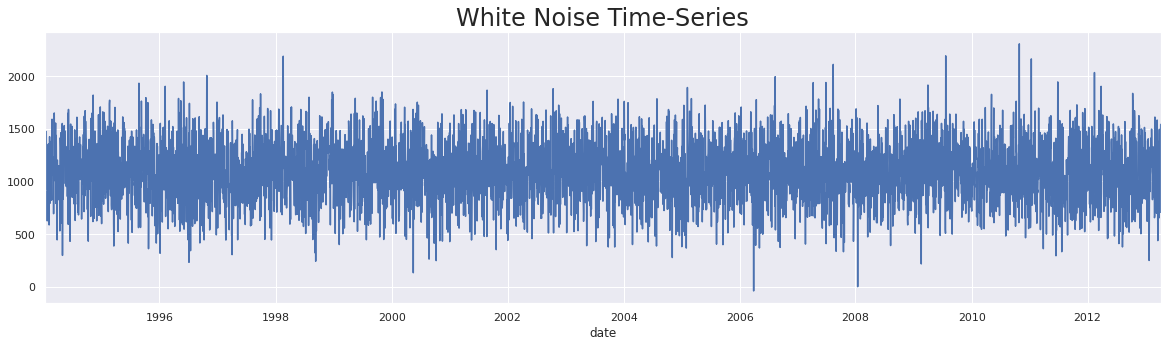

In [8]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

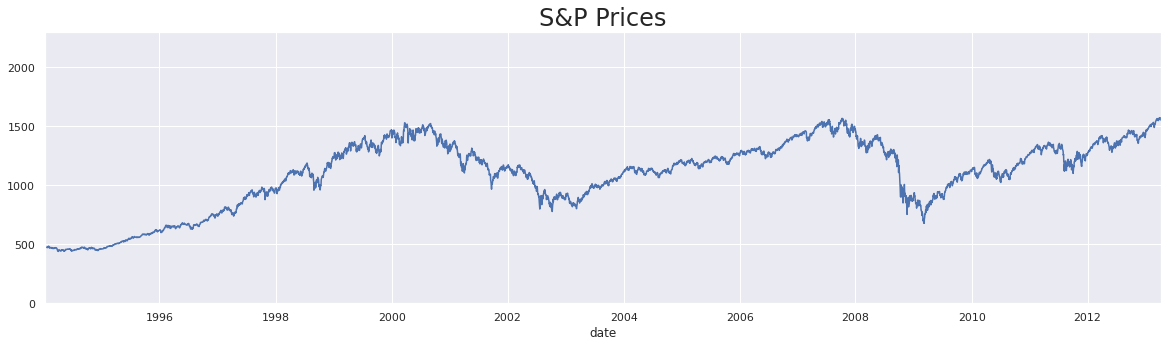

In [9]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Stationarity

In [11]:
sts.adfuller(df.market_value) # Analyse market value time series 

(-1.736984745235244,
 0.41216456967706194,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- Test statistics = -1.73698 
- 1 % = 1% critical value 
- 5 % = 5% critical value 

Note that the test statistics is greater than the 1%, 5%, 10% critical value. Hence, for all the levels of significance, there is no sufficient evidence of stationarity in the dataset. 

- Second line = p-value associated with t-statistic, 0.41 (Lower than 0.05 implies that null hypothesis is rejected and data is stationary)

Roughly 40% chance of not rejecting null hypothesis (ie. Cannot confirm that the data is stationary). 

- Third line = number of lags, 18 

There is autocorrelation going back 18 periods. 

- Fourth line: Number of observations here + lag = Length of dataset. 

- Last line: Lower value implies that it is easier to predict price or values in the future. 

In [12]:
sts.adfuller(df.wn)

(-71.46797238293406,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70742.42410959105)

### Seasonality

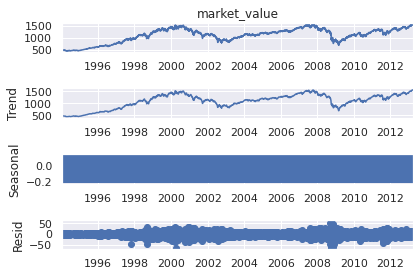

In [13]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

No seasonality in data. 

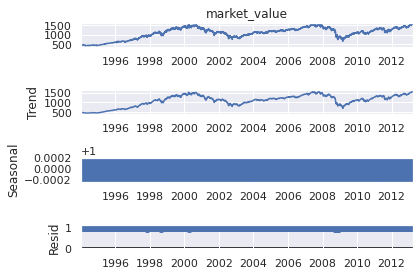

In [14]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

### ACF

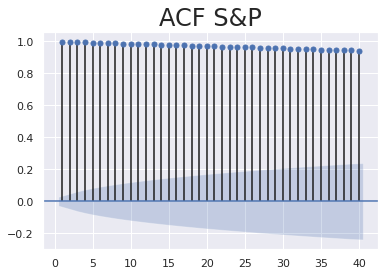

In [15]:
sgt.plot_acf(df.market_value, lags = 40, zero = False) # Finding autocorrelation for first 40 lags
plt.title("ACF S&P", size = 24)
plt.show()

- If the vertical distance for each lag is higher than the shaded area vertical distance, then there is autocorrelation for that specific lag.
- Since there is autocorrelation for lags up to 40, we can predict current price using past prices up to 40 time periods ago.

### PACF

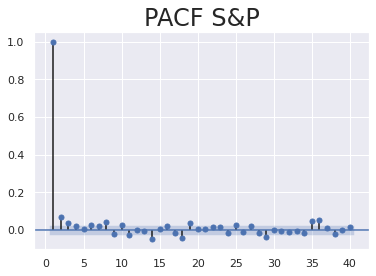

In [16]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

Only the first few lags are significant. Values from 9 lags ago has a negative correlation with current value. 

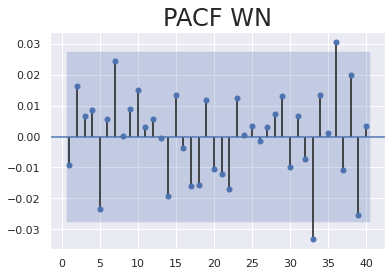

In [17]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

No autocorrelation in white noise